# Generation the circuit for LiH

## Classical calculations:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from utility import *
import tequila as tq
threshold = 1e-6 #Cutoff for UCC MP2 amplitudes and QCC ranking gradients

basis = 'sto-3g'

In [2]:
bond_lengths = np.linspace(0.7,3.0,15)
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -7.505051767361796 Eh
E = -7.655819794239806 Eh
E = -7.7520203311709555 Eh
E = -7.8123148825157 Eh
E = -7.84894732884227 Eh
E = -7.8697943049544925 Eh
E = -7.879938937375749 Eh
E = -7.8827622353101745 Eh
E = -7.88059971648109 Eh
E = -7.8751153939946565 Eh
E = -7.8675211304111885 Eh
E = -7.858714442882695 Eh
E = -7.84937032943297 Eh
E = -7.840003634317425 Eh
E = -7.831009310880966 Eh
E = -7.822684107104651 Eh
E = -7.81523359518158 Eh
E = -7.8087719702741065 Eh
E = -7.803324911639441 Eh
E = -7.7988431594552265 Eh
E = -7.4860204040662035 Eh
E = -7.63765802220073 Eh
E = -7.73469434101183 Eh
E = -7.795521367901589 Eh
E = -7.8322370882033 Eh
E = -7.852659697300259 Eh
E = -7.861855391356035 Eh
E = -7.863199260252276 Eh
E = -7.859016404399981 Eh
E = -7.850950570332546 Eh
E = -7.840182521697129 Eh
E = -7.827568566003549 Eh
E = -7.813734748189352 Eh
E = -7.799144080669862 Eh
E = -7.784145747881756 Eh
E = -7.7690109535139324 Eh
E = -7.7539578943872165 Eh
E = -7.739167578671702 Eh
E = -7.72479

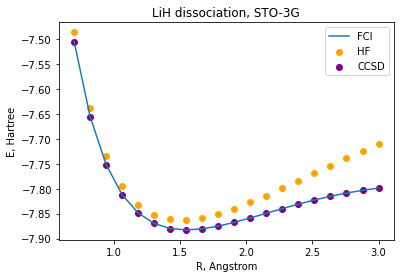

In [3]:
#Plot LiH PESs

plt.title('LiH dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## Generating Qubit Hamiltonians

In [4]:
qubit_transf = 'jw' # Jordan-Wigner transformations
lih = get_qubit_hamiltonian(mol='lih', geometry=1, basis='sto3g', qubit_transf=qubit_transf)
print(lih)

-3.934441956757915 [] +
-0.007923321157849954 [X0 X1 Y2 Y3] +
-0.0034145323580160323 [X0 X1 Y2 Z3 Z4 Y5] +
-0.0027468613203169424 [X0 X1 Y2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Y11] +
-0.0034145323580160323 [X0 X1 X3 X4] +
-0.0027468613203169424 [X0 X1 X3 Z4 Z5 Z6 Z7 Z8 Z9 X10] +
-0.004864778381761675 [X0 X1 Y4 Y5] +
-0.0022963165872997085 [X0 X1 Y4 Z5 Z6 Z7 Z8 Z9 Z10 Y11] +
-0.002296316587299708 [X0 X1 X5 Z6 Z7 Z8 Z9 X10] +
-0.002472706168385288 [X0 X1 Y6 Y7] +
-0.0024727061683852886 [X0 X1 Y8 Y9] +
-0.0017744350099502914 [X0 X1 Y10 Y11] +
0.007923321157849954 [X0 Y1 Y2 X3] +
0.0034145323580160323 [X0 Y1 Y2 Z3 Z4 X5] +
0.0027468613203169424 [X0 Y1 Y2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 X11] +
-0.0034145323580160323 [X0 Y1 Y3 X4] +
-0.0027468613203169424 [X0 Y1 Y3 Z4 Z5 Z6 Z7 Z8 Z9 X10] +
0.004864778381761675 [X0 Y1 Y4 X5] +
0.0022963165872997085 [X0 Y1 Y4 Z5 Z6 Z7 Z8 Z9 Z10 X11] +
-0.002296316587299708 [X0 Y1 Y5 Z6 Z7 Z8 Z9 X10] +
0.002472706168385288 [X0 Y1 Y6 X7] +
0.0024727061683852886 [X0 Y1 Y8 X9] +
0.

In [5]:
lih_tapered = taper_hamiltonian(lih, n_spin_orbitals=12, n_electrons=4, qubit_transf=qubit_transf)

## Tequila stuff

In [9]:
trotter_steps = 1

xyz_data = get_molecular_data('lih', geometry=1.5, xyz_format=True)
basis='sto-3g'

lih_tq = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set=basis)

print('Number of spin-orbitals (qubits): {} \n'.format(2*lih_tq.n_orbitals))

E_FCI = lih_tq.compute_energy(method='fci')

print('FCI energy: {}'.format(E_FCI))

Number of spin-orbitals (qubits): 12 

FCI energy: -7.882362286810955


In [11]:
H = lih_tq.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

U_UCCSD = lih_tq.make_uccsd_ansatz(initial_amplitudes='MP2',threshold=threshold, trotter_steps=trotter_steps)

E = tq.ExpectationValue(H=H, U=U_UCCSD)

print('\nNumber of UCCSD amplitudes: {} \n'.format(len(E.extract_variables())))

print('\nStarting optimization:\n')

result = tq.minimize(objective=E, method="BFGS", initial_values={k:0.0 for k in E.extract_variables()}, tol=1e-6)

print('\nObtained UCCSD energy: {}'.format(result.energy))


Hamiltonian has 631 terms


Number of UCCSD amplitudes: 24 


Starting optimization:

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 1024 expectationvalues

active variables : 24

E=-7.86335762  angles= {(2, 1, 5, 0): 0.0, (5, 1, 2, 1): 0.0, (5, 0, 2, 0): 0.0, (2, 0, 2, 0): 0.0, (5, 0, 5, 0): 0.0, (4, 0, 4, 1): 0.0, (2, 1, 2, 1): 0.0, (2, 0, 5, 0): 0.0, (3, 1, 3, 1): 0.0, (4, 1, 4, 0): 0.0, (5, 1, 2, 0): 0.0, (3, 0, 3, 1): 0.0, (5, 0, 2, 1): 0.0, (5, 1, 5, 0): 0.0, (4, 0, 4, 0): 0.0, (2, 0, 5, 1): 0.0, (4, 1, 4, 1): 0.0, (2, 1, 5, 1): 0.0, (3, 0, 3, 0): 0.0, (5, 1, 5, 1): 0.0, (2, 0, 2, 1): 0.0, (5, 0, 5, 1): 0.0, (2, 1, 2, 0): 0.0, (3, 1, 3, 0): 0.0}  samples= None
E=-7.83705489  angles= {(2, 1, 5, 0): -0.01038360595703125, (5, 1, 2, 1): -0.06699275970458984, (5, 0, 2, 0): -0.002532958984

E=-7.88182528  angles= {(2, 1, 5, 0): -0.0004969721707931709, (5, 1, 2, 1): -0.04575499651072544, (5, 0, 2, 0): 4.263328984666659e-05, (2, 0, 2, 0): -0.0019049824177784598, (5, 0, 5, 0): -0.00014817376445978728, (4, 0, 4, 1): 0.0037337263120692547, (2, 1, 2, 1): -0.0252509395874335, (2, 0, 5, 0): 4.263328984666721e-05, (3, 1, 3, 1): -0.026307148286562686, (4, 1, 4, 0): 0.0037338786396723484, (5, 1, 2, 0): -0.00016273247151759386, (3, 0, 3, 1): 0.003733810282947797, (5, 0, 2, 1): -0.0004966767989868509, (5, 1, 5, 0): -0.0005262654644778407, (4, 0, 4, 0): -0.004746651773347241, (2, 0, 5, 1): -0.0001628810104289772, (4, 1, 4, 1): -0.026319931726850397, (2, 1, 5, 1): -0.04575509559131226, (3, 0, 3, 0): -0.0047474032264173145, (5, 1, 5, 1): -0.10986224798408417, (2, 0, 2, 1): -0.00043700262493782374, (5, 0, 5, 1): -0.0005261752740382212, (2, 1, 2, 0): -0.0004371944213877896, (3, 1, 3, 0): 0.0037340009088348454}  samples= None
E=-7.88191866  angles= {(2, 1, 5, 0): -0.0004408372981087801, (5,

E=-7.88196442  angles= {(2, 1, 5, 0): -0.0004125524690789348, (5, 1, 2, 1): -0.04798721010657055, (5, 0, 2, 0): -8.444021497090528e-05, (2, 0, 2, 0): -0.003969699403207033, (5, 0, 5, 0): -0.0008414176588874342, (4, 0, 4, 1): 0.002962748307676762, (2, 1, 2, 1): -0.02384114320653659, (2, 0, 5, 0): -8.529028008165687e-05, (3, 1, 3, 1): -0.0274900687259848, (4, 1, 4, 0): 0.002963458717704844, (5, 1, 2, 0): -1.8865483322200956e-05, (3, 0, 3, 1): 0.002963262378648861, (5, 0, 2, 1): -0.0004123452254068423, (5, 1, 5, 0): 0.00021116800092388073, (4, 0, 4, 0): -0.0017992532059700084, (2, 0, 5, 1): -1.8769073571010953e-05, (4, 1, 4, 1): -0.02750023946784077, (2, 1, 5, 1): -0.047987147577138775, (3, 0, 3, 0): -0.001799291174247299, (5, 1, 5, 1): -0.10941978771124873, (2, 0, 2, 1): -4.074227783779755e-06, (5, 0, 5, 1): 0.00021127265830900248, (2, 1, 2, 0): -5.152353707882178e-06, (3, 1, 3, 0): 0.0029627010069096966}  samples= None
E=-7.88196451  angles= {(2, 1, 5, 0): -0.0004022790558003388, (5, 1,

E=-7.88196452  angles= {(2, 1, 5, 0): -0.00041011735812510416, (5, 1, 2, 1): -0.048002830465554966, (5, 0, 2, 0): -6.651875115157481e-05, (2, 0, 2, 0): -0.003950063866220572, (5, 0, 5, 0): -0.0008448503772139835, (4, 0, 4, 1): 0.002954769191686496, (2, 1, 2, 1): -0.023735733396030873, (2, 0, 5, 0): -6.795861279933348e-05, (3, 1, 3, 1): -0.027448323422332457, (4, 1, 4, 0): 0.002955268822364599, (5, 1, 2, 0): -1.3879749015457127e-05, (3, 0, 3, 1): 0.0029554920698600384, (5, 0, 2, 1): -0.00041066070673176716, (5, 1, 5, 0): 0.00032507133179828765, (4, 0, 4, 0): -0.0018070351461752726, (2, 0, 5, 1): -1.4515735994945611e-05, (4, 1, 4, 1): -0.027458331914814157, (2, 1, 5, 1): -0.04800257385201216, (3, 0, 3, 0): -0.0018068801280311992, (5, 1, 5, 1): -0.10944486177621232, (2, 0, 2, 1): -2.7517782951609864e-05, (5, 0, 5, 1): 0.00032468548683647376, (2, 1, 2, 0): -2.86946890403744e-05, (3, 1, 3, 0): 0.0029545439656796573}  samples= None
E=-7.88196452  angles= {(2, 1, 5, 0): -0.0004103174984291768